<a href="https://colab.research.google.com/github/Tanishka-Goyal/ImageClassification/blob/main/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/LungCancerClassification/

/content/drive/MyDrive/LungCancerClassification


In [ ]:
!unzip lung_image_sets.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/lung_image_sets/lung_scc/lungscc571.jpeg  
  inflating: dataset/__MACOSX/lung_image_sets/lung_scc/._lungscc571.jpeg  
  inflating: dataset/lung_image_sets/lung_scc/lungscc4063.jpeg  
  inflating: dataset/__MACOSX/lung_image_sets/lung_scc/._lungscc4063.jpeg  
  inflating: dataset/lung_image_sets/lung_scc/lungscc1261.jpeg  
  inflating: dataset/__MACOSX/lung_image_sets/lung_scc/._lungscc1261.jpeg  
  inflating: dataset/lung_image_sets/lung_scc/lungscc4599.jpeg  
  inflating: dataset/__MACOSX/lung_image_sets/lung_scc/._lungscc4599.jpeg  
  inflating: dataset/lung_image_sets/lung_scc/lungscc121.jpeg  
  inflating: dataset/__MACOSX/lung_image_sets/lung_scc/._lungscc121.jpeg  
  inflating: dataset/lung_image_sets/lung_scc/lungscc4433.jpeg  
  inflating: dataset/__MACOSX/lung_image_sets/lung_scc/._lungscc4433.jpeg  
  inflating: dataset/lung_image_sets/lung_scc/lungscc1631.jpeg  
  inflating: dataset/__MACOSX/lung_image_s

In [ ]:
%cd dataset/


/content/drive/MyDrive/LungCancerClassification/dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


import numpy as np

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random


In [ ]:
data_dir = 'lung_image_sets'
class_dirs = os.listdir(data_dir)
print(class_dirs)

['lung_aca', 'lung_n', 'lung_scc']


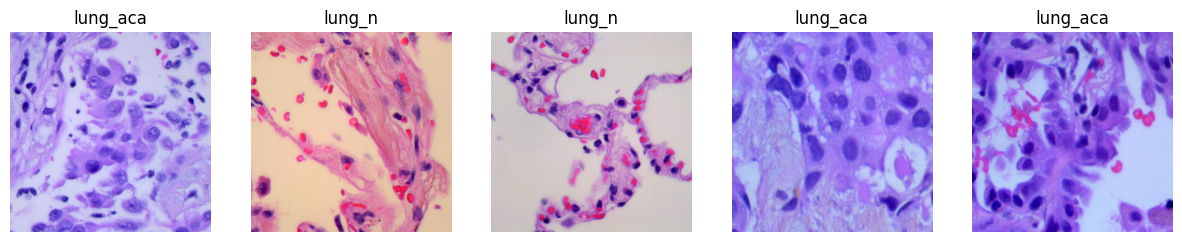

In [ ]:
#  Visualize a few sample images from random classes
num_images_to_visualize = 5
plt.figure(figsize=(15, 5))
for i in range(num_images_to_visualize):
    # Select a random class directory
    class_dir = random.choice(class_dirs)

    # List of image files in the selected class directory
    image_files = os.listdir(os.path.join(data_dir, class_dir))

    # Select a random image file
    image_file = random.choice(image_files)

    # Path to the selected image
    img_path = os.path.join(data_dir, class_dir, image_file)

    # Load and display the image
    img = mpimg.imread(img_path)
    plt.subplot(1, num_images_to_visualize, i+1)
    plt.imshow(img)
    plt.title(class_dir)  # Display the class name as title
    plt.axis('off')

plt.show()

In [ ]:
# Shuffle the class directories
random.shuffle(class_dirs)

# Parameters for model and training
input_shape = (128, 128, 3) #(224.224)
num_classes = len(class_dirs)
batch_size = 264 #(32)
epochs = 1 #(10)

In [ ]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 12000 images belonging to 3 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3000 images belonging to 3 classes.


In [ ]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# compile model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs = epochs)

46/46 [==============================] - 2448s 53s/step - loss: 0.6194 - accuracy: 0.6948


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

12/12 [==============================] - 26s 2s/step - loss: 0.4560 - accuracy: 0.7763
Test Loss: 0.455971896648407
Test Accuracy: 0.7763333320617676


In [ ]:
# save the model
model.save('lungClassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 49.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import tf2onnx
import onnx
from google.colab import files

In [ ]:
# Load the saved TensorFlow/Keras model
model = load_model('lungClassifier.h5')

# Convert the model to ONNX format with specified IR version and operator set version
onnx_model, _ = tf2onnx.convert.from_keras(model, opset=11, output_path='bird_classifier_model.onnx')

# Save the ONNX model to a file
onnx.save(onnx_model, 'lungClassifier.onnx')

In [ ]:
files.download('lungClassifier.onnx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>